<h1>Yangco, Tristan Josh D.</h1>

<h3>Practical Hands on in Decision Trees</h3>

Dataset: Traffic.csv

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
traffic = pd.read_csv(r'Traffic.csv')
traffic

,Weather,Times of Week,Time of day,Traffic Jam
0,Clear,Workday,Morning,Yes
1,Clear,Workday,Lunch,No
2,Clear,Workday,Evening,Yes
3,Clear,Weekend,Morning,No
4,Clear,Weekend,Lunch,No
5,Clear,Weekend,Evening,No
6,Rainy,Workday,Morning,Yes
7,Rainy,Workday,Lunch,Yes
8,Rainy,Workday,Evening,Yes
9,Rainy,Weekend,Morning,No


In [21]:
#Categorical to numerical data
jam= ['Traffic Jam']
#Defining the map function
def jam_map(y):
 return y.map({'Yes': 1, 'No': 0})

In [22]:
traffic[jam]=traffic[jam].apply(jam_map)
traffic

,Weather,Times of Week,Time of day,Traffic Jam
0,Clear,Workday,Morning,1
1,Clear,Workday,Lunch,0
2,Clear,Workday,Evening,1
3,Clear,Weekend,Morning,0
4,Clear,Weekend,Lunch,0
5,Clear,Weekend,Evening,0
6,Rainy,Workday,Morning,1
7,Rainy,Workday,Lunch,1
8,Rainy,Workday,Evening,1
9,Rainy,Weekend,Morning,0


In [23]:
#Categorical to numerical data
weather= ['Weather']
timesOfWeek= ['Times of Week']
timeOfDay= ['Time of day']
#Defining the map function
def weather_map(x):
 return x.map({'Clear': 0, 'Rainy': 1, 'Snowy': 2})

def TimesOfWeek_map(x):
 return x.map({'Workday': 0, 'Weekend': 1})

def TimeOfDay_map(x):
 return x.map({'Morning': 0, 'Lunch': 1, 'Evening': 2})

In [24]:
traffic[weather]=traffic[weather].apply(weather_map)
traffic[timesOfWeek]=traffic[timesOfWeek].apply(TimesOfWeek_map)
traffic[timeOfDay]=traffic[timeOfDay].apply(TimeOfDay_map)
traffic

,Weather,Times of Week,Time of day,Traffic Jam
0,0,0,0.0,1
1,0,0,NaN,0
2,0,0,2.0,1
3,0,1,0.0,0
4,0,1,NaN,0
5,0,1,2.0,0
6,1,0,0.0,1
7,1,0,NaN,1
8,1,0,2.0,1
9,1,1,0.0,0


In [25]:
traffic = traffic.fillna("1")
traffic

,Weather,Times of Week,Time of day,Traffic Jam
0,0,0,0,1
1,0,0,1,0
2,0,0,2,1
3,0,1,0,0
4,0,1,1,0
5,0,1,2,0
6,1,0,0,1
7,1,0,1,1
8,1,0,2,1
9,1,1,0,0


In [26]:
X = traffic.drop('Traffic Jam', axis = 1).values
Y = traffic['Traffic Jam'].values

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X, Y)

DecisionTreeClassifier()

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, 'tree.dot')

In [29]:
! dot -Tpng tree.dot -o tree.png

<h3>Variables</h3>

<b>X<sub>0</sub></b> = Weather<br>
<b>X<sub>1</sub></b> = Times of week<br>
<b>X<sub>2</sub></b> = Time of Day<br>

<b>Y</b> = Traffic Jam

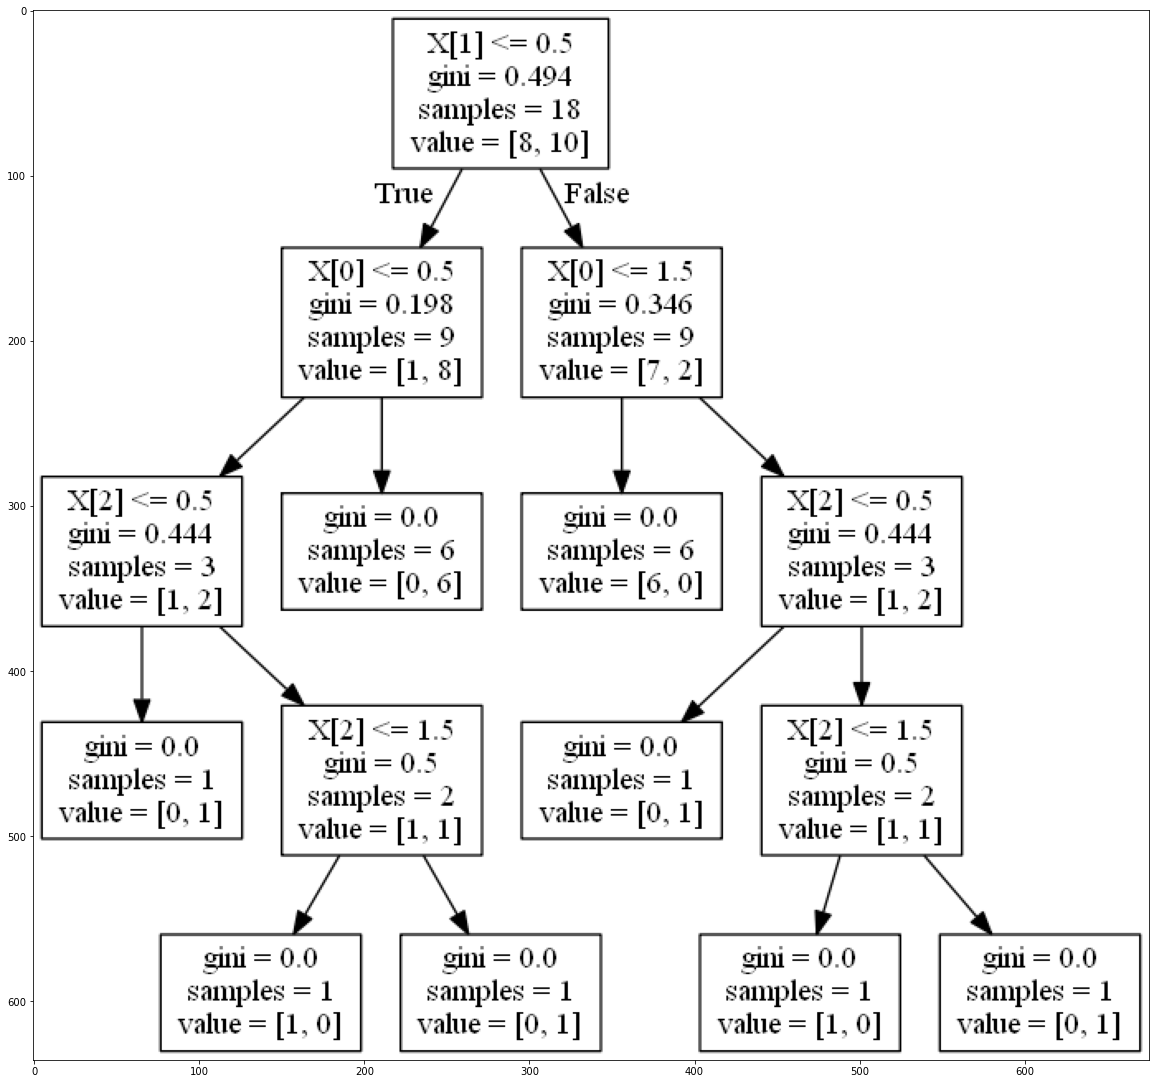

In [30]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20,20))
plt.imshow(img)

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=0)
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
y_pred = decisionTreeRegressor.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [36]:
confusion_matrix(y_test, y_pred)

array([[1, 1],
       [0, 2]], dtype=int64)